In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

Postcode In Use?   Latitude  Longitude  Easting  Northing  Grid Ref  \
0  E18 1AB     Yes  51.592688   0.026767   540492    190150  TQ404901   
1  E18 1AD     Yes  51.592509   0.026280   540459    190129  TQ404901   
2  E18 1AG     Yes  51.592125   0.027074   540515    190088  TQ405900   
3  E18 1AH     Yes  51.592053   0.026579   540481    190079  TQ404900   
4  E18 1AN     Yes  51.592716   0.026710   540488    190153  TQ404901   

           County   District            Ward  ... Distance to sea LSOA21 Code  \
0  Greater London  Redbridge  South Woodford  ...         30.6714   E01003668   
1  Greater London  Redbridge  South Woodford  ...         30.6907   E01003668   
2  Greater London  Redbridge  South Woodford  ...         30.6220   E01003668   
3  Greater London  Redbridge  South Woodford  ...         30.6477   E01003668   
4  Greater London  Redbridge  South Woodford  ...         30.6764   E01003668   

  Lower layer super output area 2021 MSOA21 Code  \
0                     Redbridge 007A   E02000757   
1                     Redbridge 007A   E02000757   
2                     Redbridge 007A   E02000757   
3                     Redbridge 007A   E02000757   
4                     Redbridge 007A   E02000757   

  Middle layer super output area 2021 Census output area 2021  IMD decile  \
0            South Woodford High Road               E00018497           8   
1            South Woodford High Road               E00018497           8   
2            South Woodford High Road               E00018497           8   
3            South Woodford High Road               E00018481           8   
4            South Woodford High Road               E00018497           8   

  Constituency Code 2024  Constituency Name 2024  Property Type  
0              E14001334     Leyton and Wanstead            NaN  
1              E14001334     Leyton and Wanstead           Flat  
2              E14001334     Leyton and Wanstead          Other  
3              E14001334     Leyton and Wanstead            NaN  
4              E14001334     Leyton and Wanstead           Flat  

[5 rows x 62 columns]

In [4]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    return R * c

# Example usage to calculate distance between two postcodes:
lat1, lon1 = 51.592688, 0.026767  # Postcode E18 1AB
lat2, lon2 = 51.592509, 0.026280  # Postcode E18 1AD

distance = haversine(lat1, lon1, lat2, lon2)
print(f"Distance between E18 1AB and E18 1AD: {distance:.2f} km")


Distance between E18 1AB and E18 1AD: 0.04 km


In [5]:
graph = {}

# Loop over the dataframe to create edges between each pair of postcodes
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            source = row1['Postcode']
            destination = row2['Postcode']
            lat1, lon1 = row1['Latitude'], row1['Longitude']
            lat2, lon2 = row2['Latitude'], row2['Longitude']
            distance = haversine(lat1, lon1, lat2, lon2)
            
            if source not in graph:
                graph[source] = {}
            graph[source][destination] = distance
print(graph)

{'E18 1AB': {'E18 1AD': 0.03908884512719022, 'E18 1AG': 0.06609738660593235, 'E18 1AH': 0.07179319754529435, 'E18 1AN': 0.005019742131944042, 'E18 1AP': 0.2134809581367852, 'E18 1AQ': 0.06571476419895525, 'E18 1AR': 0.1094750801085355, 'E18 1AU': 0.03442542976206834, 'E18 1AY': 0.19749767651164793, 'E18 1AZ': 0.09563042806254575, 'E18 1BA': 0.10666180111032784, 'E18 1BD': 0.23599896781549942, 'E18 1BF': 0.20434123597878598, 'E18 1BG': 0.20261788209457968, 'E18 1BH': 0.48032851784165986, 'E18 1BL': 0.22486915802832297, 'E18 1BN': 0.2562310973293165, 'E18 1BP': 0.32263405428570474, 'E18 1BQ': 0.27917622168085643, 'E18 1BT': 0.35583231786772235, 'E18 1BU': 0.1859692303815517, 'E18 1BW': 0.2891784171912866, 'E18 1BX': 0.0677062547070898, 'E18 1BY': 0.08521012699806418, 'E18 1BZ': 0.08031727564500972, 'E18 1DB': 0.79982816877537, 'E18 1DD': 0.21249302990519328, 'E18 1DE': 0.22651867101810574, 'E18 1DF': 0.25295409520595086, 'E18 1DG': 0.3387595989873832, 'E18 1DH': 0.5265186337535168, 'E18 

In [6]:
start = 'E18 1AB'
target = 'E18 1AD'

distances, previous_nodes = dijkstra(graph, start)
path = shortest_path(previous_nodes, start, target)

print(f"The shortest path from {start} to {target} is {path} with a distance of {distances[target]:.2f} km")


NameError: name 'dijkstra' is not defined

Shortest path: ['A', 'B', 'D']


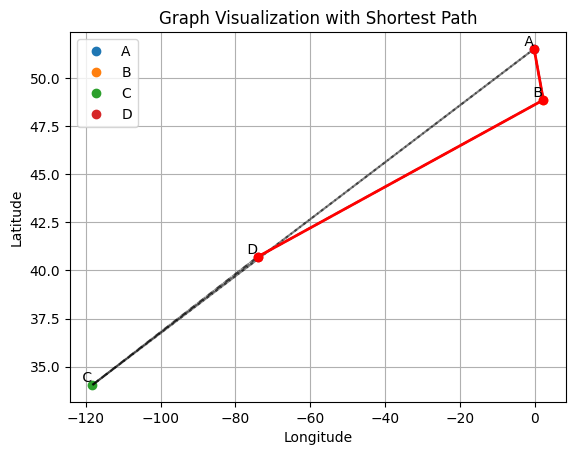

In [ ]:
import heapq
import math
import matplotlib.pyplot as plt

def heuristic(node1, node2):
    # Use Euclidean distance as heuristic
    return math.sqrt((node1['latitude'] - node2['latitude'])**2 + (node1['longitude'] - node2['longitude'])**2)

def a_star_algorithm(start, goal, nodes):
    open_list = []
    closed_list = set()
    heapq.heappush(open_list, (0, start))
    g_scores = {start: 0}
    f_scores = {start: heuristic(nodes[start], nodes[goal])}
    came_from = {}
    
    while open_list:
        _, current = heapq.heappop(open_list)
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # Return reversed path
        
        closed_list.add(current)
        
        for neighbor in nodes[current]['neighbors']:
            if neighbor in closed_list:
                continue
            
            tentative_g_score = g_scores[current] + heuristic(nodes[current], nodes[neighbor])
            
            if neighbor not in g_scores or tentative_g_score < g_scores[neighbor]:
                came_from[neighbor] = current
                g_scores[neighbor] = tentative_g_score
                f_scores[neighbor] = g_scores[neighbor] + heuristic(nodes[neighbor], nodes[goal])
                if neighbor not in [i[1] for i in open_list]:
                    heapq.heappush(open_list, (f_scores[neighbor], neighbor))
    
    return None  # If no path is found

def plot_graph(nodes, path=None):
    fig, ax = plt.subplots()
    
    # Plot nodes
    for node, info in nodes.items():
        ax.plot(info['longitude'], info['latitude'], 'o', label=node)
        ax.text(info['longitude'], info['latitude'], ' ' + node, verticalalignment='bottom', horizontalalignment='right')
    
    # Plot edges
    for node, info in nodes.items():
        for neighbor in info['neighbors']:
            ax.plot(
                [nodes[node]['longitude'], nodes[neighbor]['longitude']],
                [nodes[node]['latitude'], nodes[neighbor]['latitude']],
                'k--', alpha=0.5
            )
    
    # Plot path
    if path:
        path_latitudes = [nodes[node]['latitude'] for node in path]
        path_longitudes = [nodes[node]['longitude'] for node in path]
        ax.plot(path_longitudes, path_latitudes, 'r-', linewidth=2, marker='o')
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Graph Visualization with Shortest Path')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
nodes = {
    'A': {'latitude': 51.5074, 'longitude': -0.1278, 'neighbors': ['B', 'C']},
    'B': {'latitude': 48.8566, 'longitude': 2.3522, 'neighbors': ['A', 'D']},
    'C': {'latitude': 34.0522, 'longitude': -118.2437, 'neighbors': ['A', 'D']},
    'D': {'latitude': 40.7128, 'longitude': -74.0060, 'neighbors': ['B', 'C']}
}

start = 'A'
goal = 'D'
path = a_star_algorithm(start, goal, nodes)
print("Shortest path:", path)

# Visualize the graph
plot_graph(nodes, path)


In [ ]:
import math
from heapq import heappop, heappush
import pandas as pd

# Haversine function to calculate the distance between two points on the Earth
def haversine(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    R = 6371  # Earth radius in kilometers
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return R * c  # Distance in kilometers

# A* Algorithm implementation
def a_star(graph, start, goal):
    open_set = []
    heappush(open_set, (0, start))
    
    g_costs = {start: 0}
    f_costs = {start: haversine(graph[start], graph[goal])}
    came_from = {}
    
    while open_set:
        current_f_cost, current = heappop(open_set)
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path
        
        for neighbor in graph:
            if neighbor == current:
                continue
            tentative_g_cost = g_costs[current] + haversine(graph[current], graph[neighbor])
            
            if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                came_from[neighbor] = current
                g_costs[neighbor] = tentative_g_cost
                f_costs[neighbor] = tentative_g_cost + haversine(graph[neighbor], graph[goal])
                heappush(open_set, (f_costs[neighbor], neighbor))
    
    return None  # No path found

# Construct the graph from the data
def construct_graph(df):
    graph = {}
    for _, row in df.iterrows():
        graph[row['Postcode']] = (row['Latitude'], row['Longitude'])
    return graph

# Load the CSV file
file_path = 'E18 postcodes.csv'
df = pd.read_csv('dataset.csv')

# Construct the graph from the data
graph = construct_graph(df)

# Interactive version: get start and end postcodes as input from the user
def get_user_input_and_find_path(graph):
    start_postcode = input("Enter the start postcode: ")
    end_postcode = input("Enter the end postcode: ")

    if start_postcode not in graph:
        print(f"Start postcode '{start_postcode}' not found in the data.")
        return
    if end_postcode not in graph:
        print(f"End postcode '{end_postcode}' not found in the data.")
        return

    shortest_path = a_star(graph, start_postcode, end_postcode)

    if shortest_path:
        print(f"Shortest path from {start_postcode} to {end_postcode}:")
        print(" -> ".join(shortest_path))
    else:
        print(f"No path found from {start_postcode} to {end_postcode}.")

# Get user input and find the path
get_user_input_and_find_path(graph)


Shortest path from E18 2HL to E18 1RD:
E18 2HL -> E18 1RD


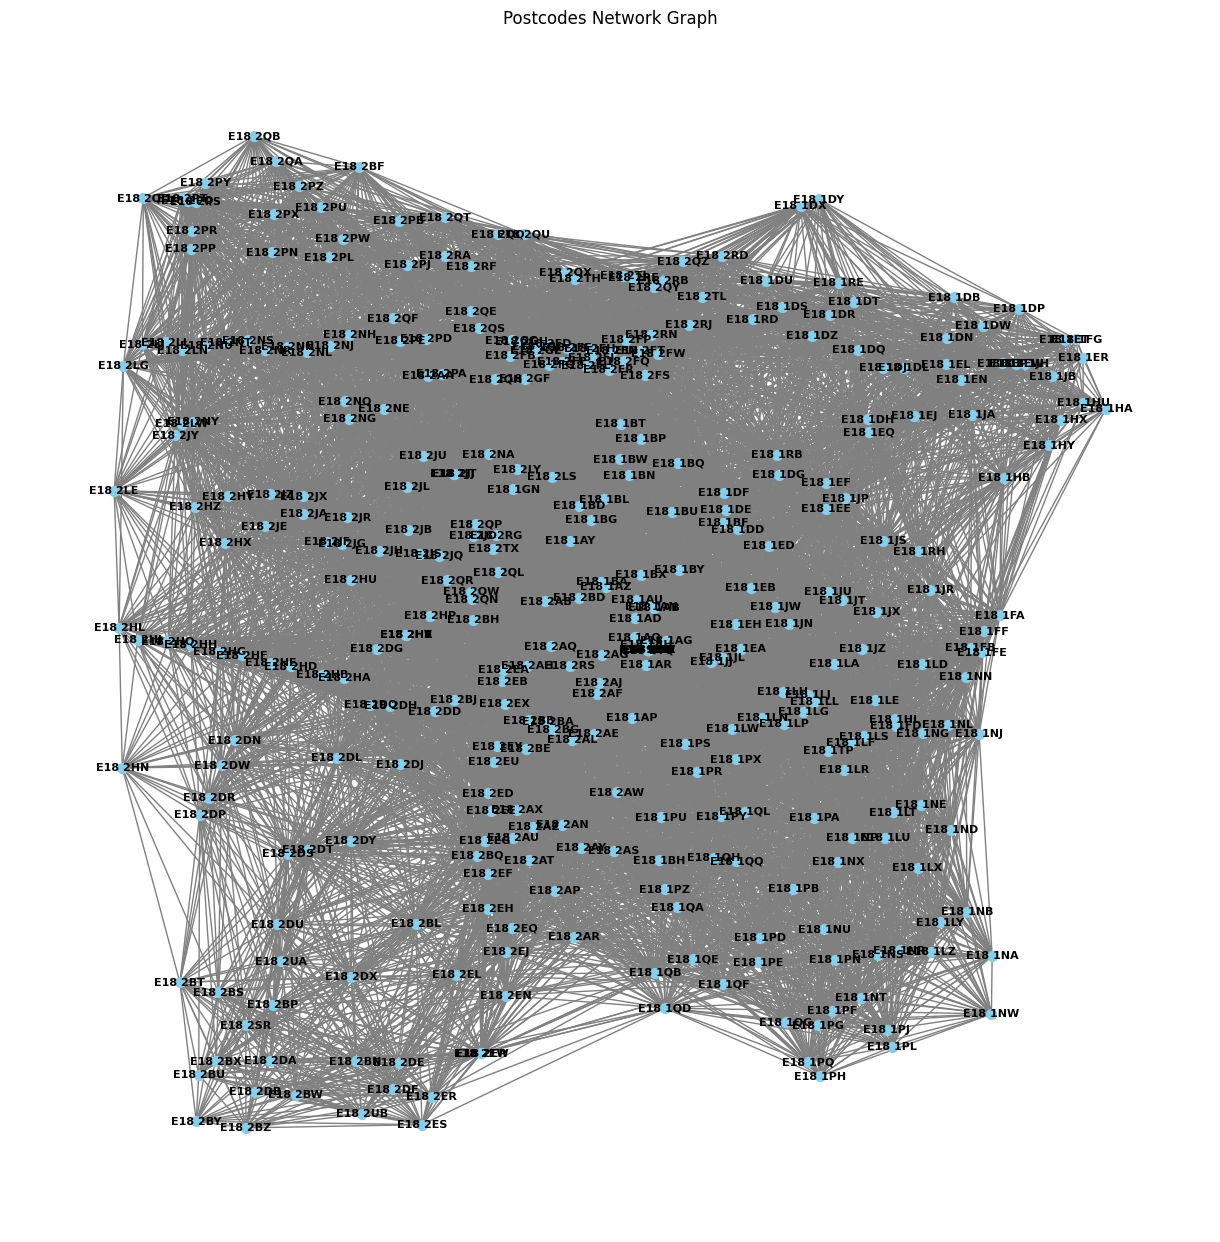

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
#file_path = 'E18 postcodes.csv'
df = pd.read_csv('dataset.csv')

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes to the graph with their positions
for _, row in df.iterrows():
    G.add_node(row['Postcode'], pos=(row['Longitude'], row['Latitude']))

# Optionally, add edges between close postcodes
# This can be based on a threshold distance, e.g., connect nodes that are within 0.01 degrees in latitude/longitude
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            distance = haversine((row1['Latitude'], row1['Longitude']), (row2['Latitude'], row2['Longitude']))
            if distance < 0.5:  # You can adjust the threshold as needed (0.5 km here)
                G.add_edge(row1['Postcode'], row2['Postcode'])

# Get positions for all nodes
pos = nx.get_node_attributes(G, 'pos')

# Draw the network graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue", font_size=8, font_weight="bold", edge_color="gray")
plt.title('Postcodes Network Graph')
plt.show()


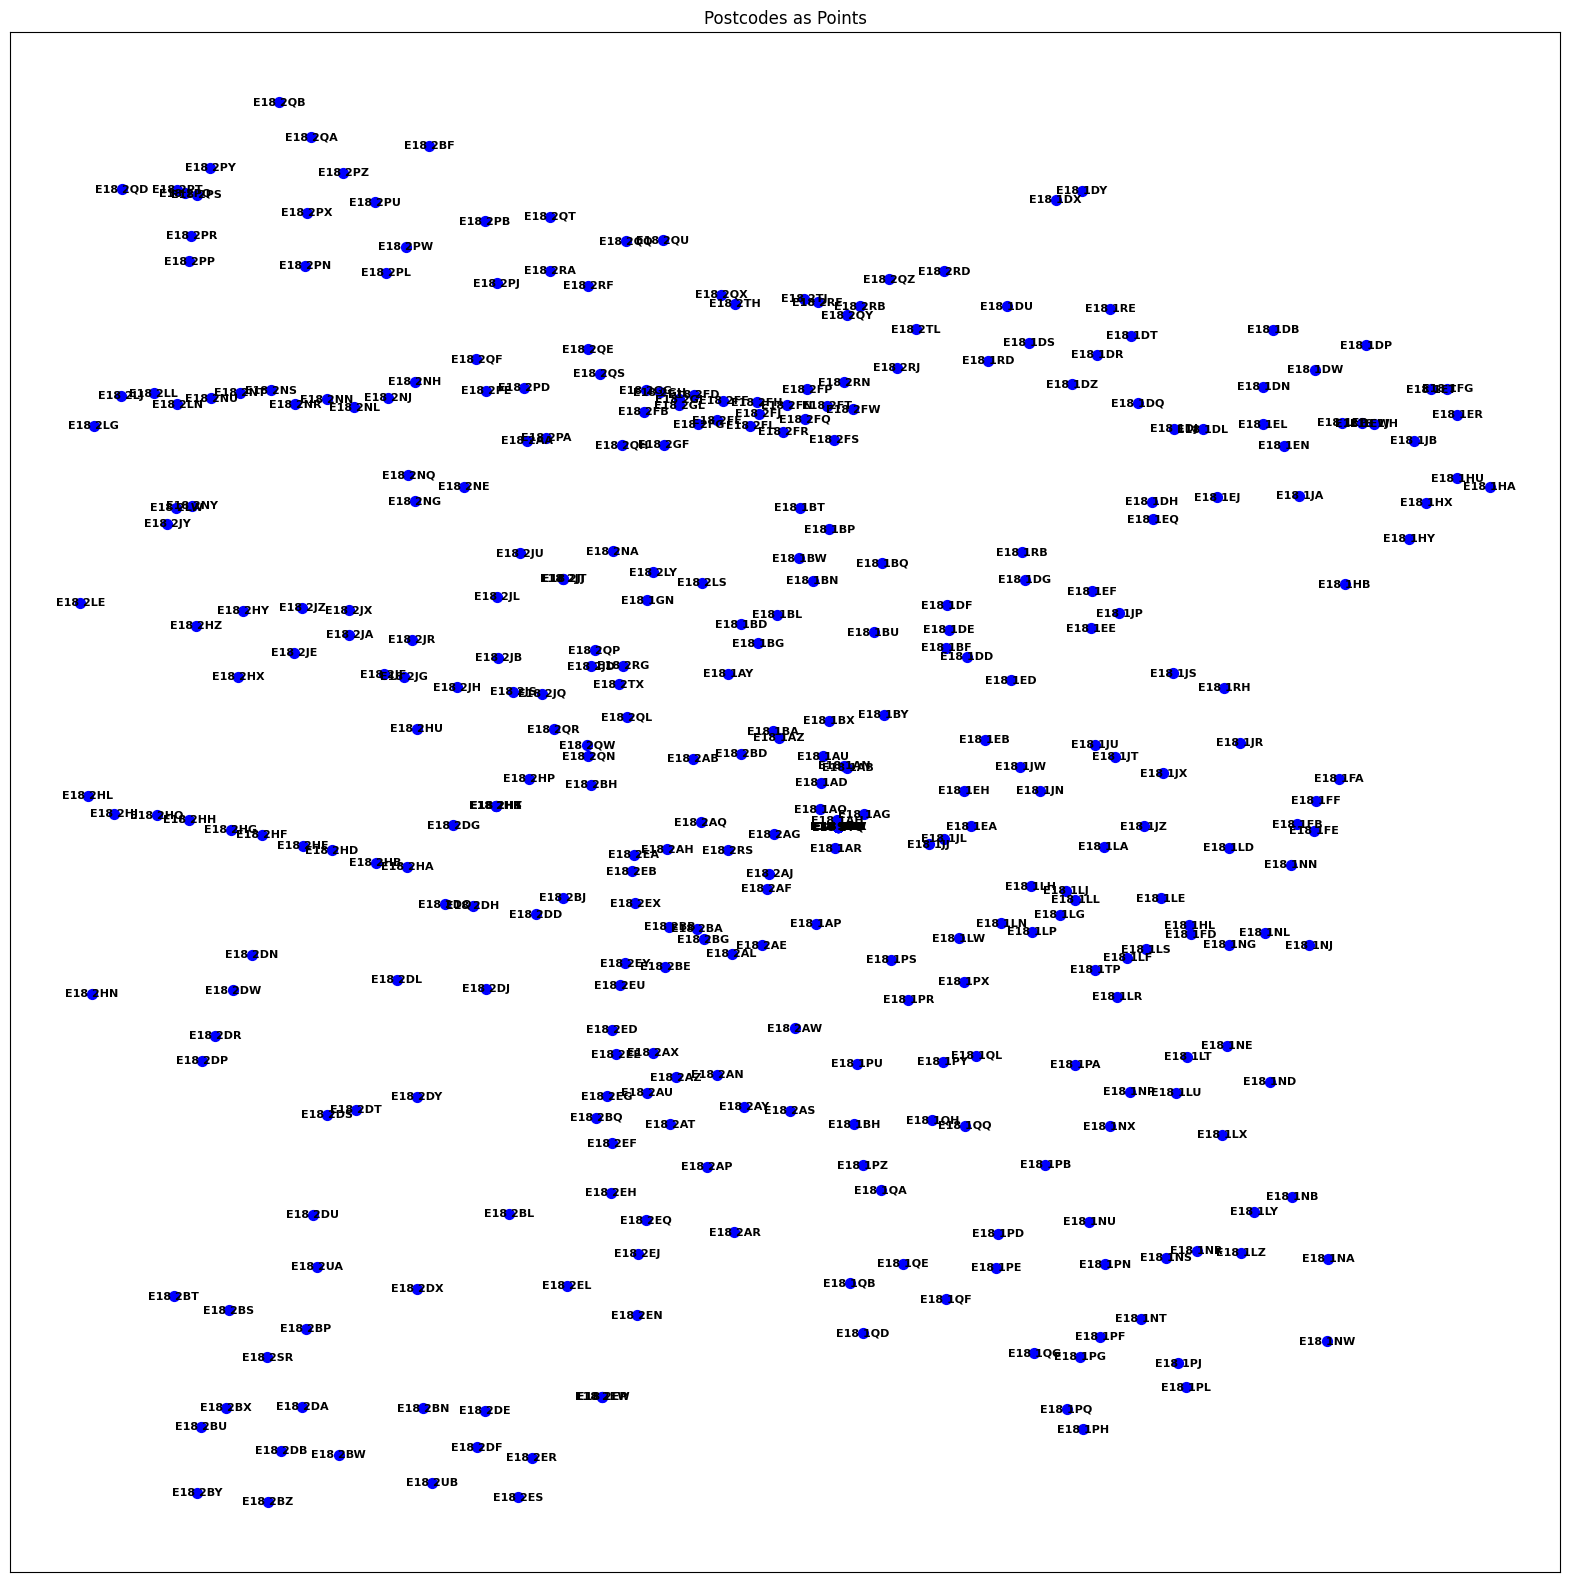

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for _, row in df.iterrows():
    G.add_node(row['Postcode'], pos=(row['Longitude'], row['Latitude']))
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G, pos, node_size=50, node_color="blue")
nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

plt.title('Postcodes as Points')
plt.show()


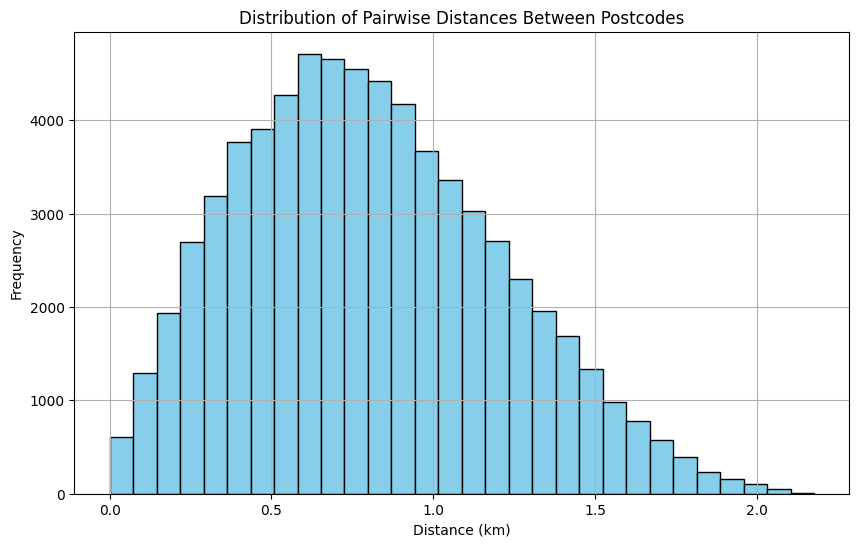

Mean Distance: 0.80 km
Median Distance: 0.77 km
Minimum Distance: 0.00 km
Maximum Distance: 2.18 km


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate pairwise distances using the Haversine formula
def haversine(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    R = 6371  # Earth radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c  # Distance in kilometers

# Calculate pairwise distances between all postcodes
distances = []
postcode_pairs = list(combinations(df[['Postcode', 'Latitude', 'Longitude']].values, 2))

for (postcode1, lat1, lon1), (postcode2, lat2, lon2) in postcode_pairs:
    distance = haversine((lat1, lon1), (lat2, lon2))
    distances.append(distance)

# Convert the distances to a numpy array for easy manipulation
distances = np.array(distances)

# Graphical Representation: Histogram of distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Pairwise Distances Between Postcodes')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics
mean_distance = np.mean(distances)
median_distance = np.median(distances)
min_distance = np.min(distances)
max_distance = np.max(distances)

print(f"Mean Distance: {mean_distance:.2f} km")
print(f"Median Distance: {median_distance:.2f} km")
print(f"Minimum Distance: {min_distance:.2f} km")
print(f"Maximum Distance: {max_distance:.2f} km")


Shortest path from E18 2HN to E18 1JA:
E18 2HN -> E18 2HA -> E18 2BH -> E18 1BF -> E18 1JA


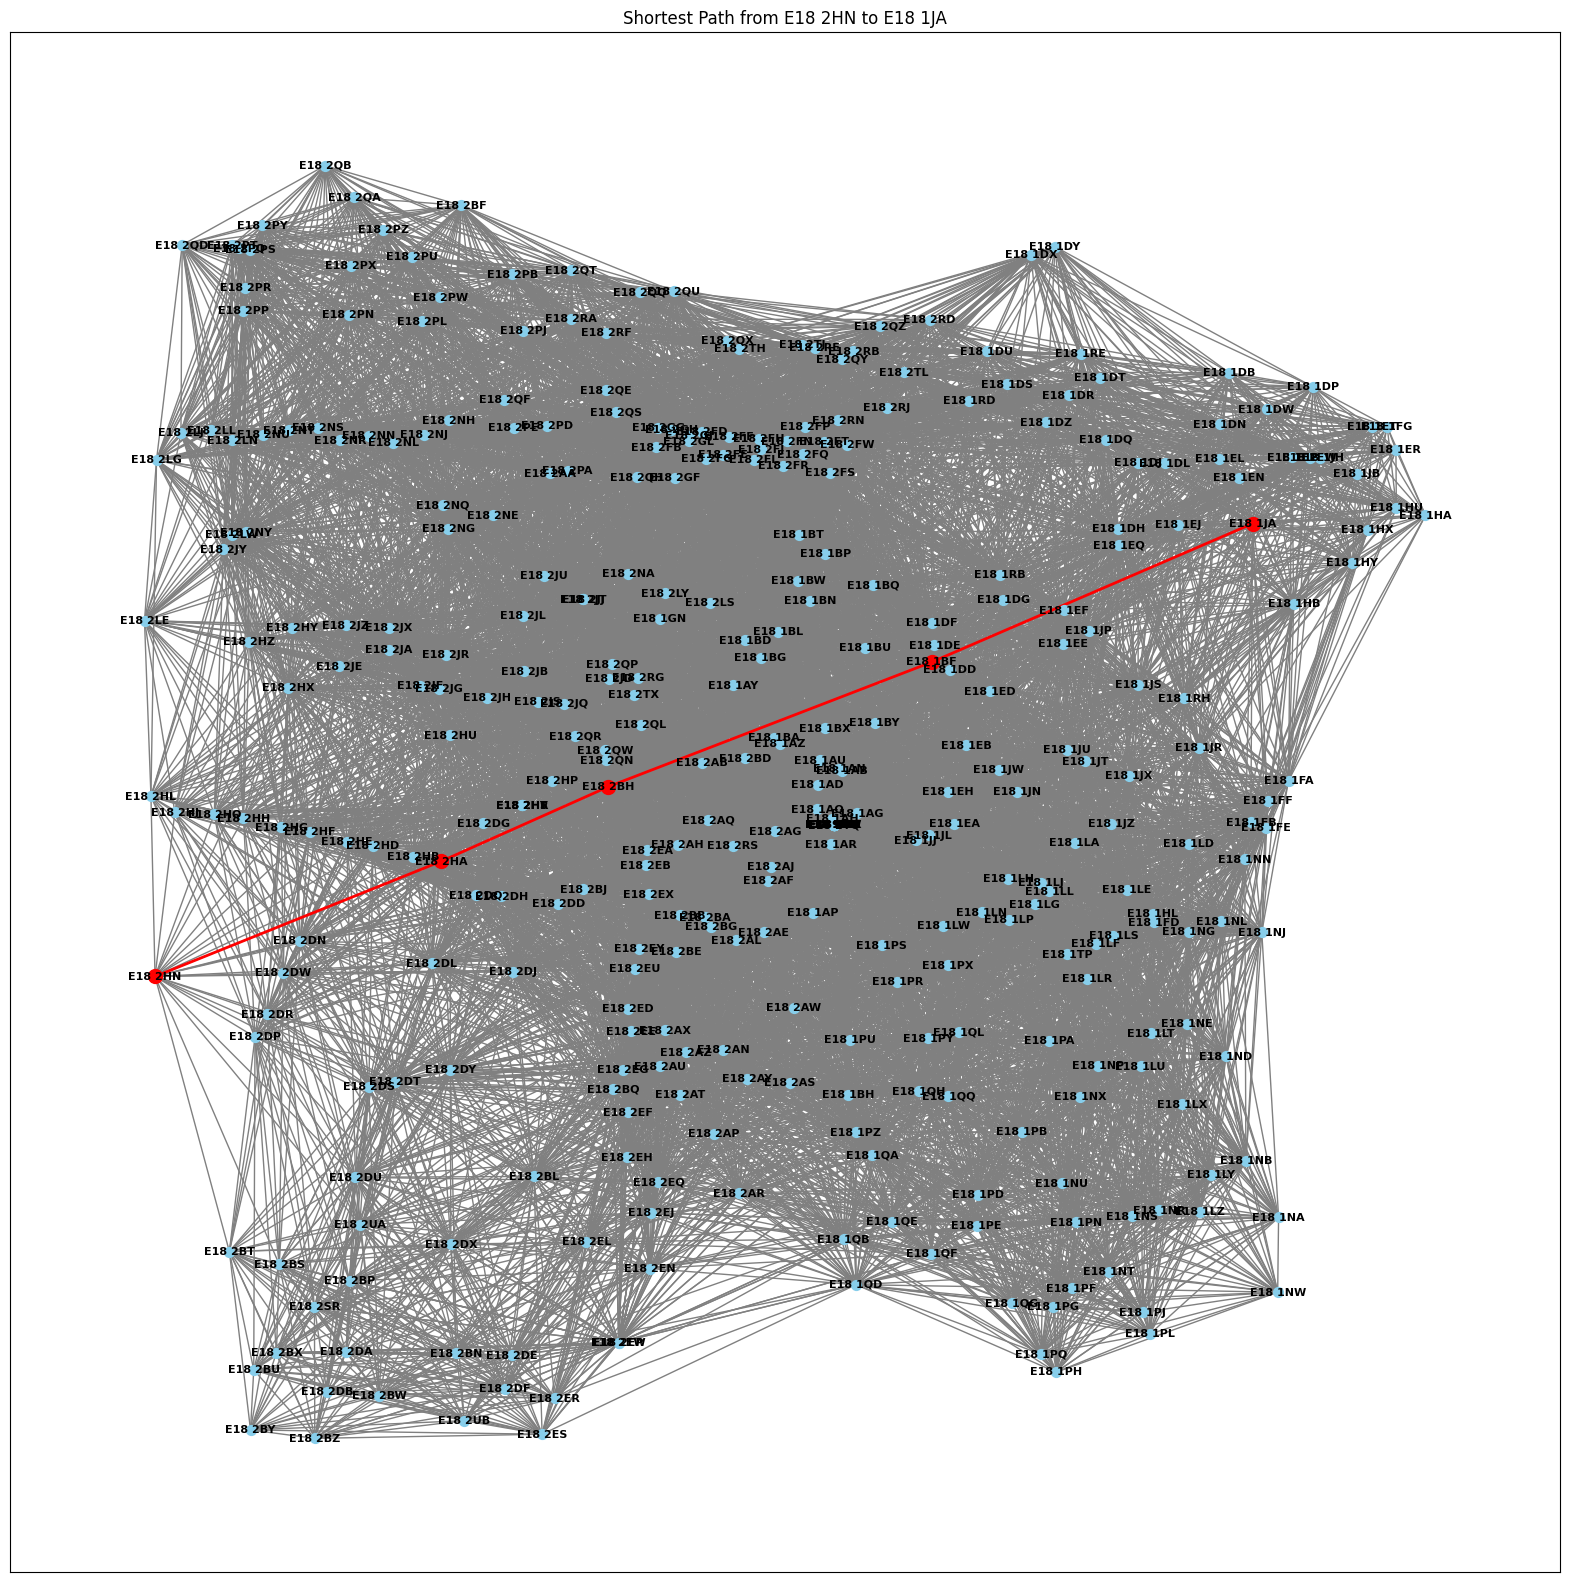

In [ ]:
import math
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Function to calculate the Haversine distance between two points on Earth
def haversine(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    R = 6371  # Earth radius in kilometers
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return R * c  # Distance in kilometers

# A* Algorithm implementation to find the shortest path
def a_star(graph, start, goal):
    open_set = []
    heappush(open_set, (0, start))
    
    g_costs = {start: 0}
    f_costs = {start: haversine(graph.nodes[start]['pos'], graph.nodes[goal]['pos'])}
    came_from = {}
    
    while open_set:
        current_f_cost, current = heappop(open_set)
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path
        
        for neighbor in graph.neighbors(current):
            tentative_g_cost = g_costs[current] + haversine(graph.nodes[current]['pos'], graph.nodes[neighbor]['pos'])
            
            if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                came_from[neighbor] = current
                g_costs[neighbor] = tentative_g_cost
                f_costs[neighbor] = tentative_g_cost + haversine(graph.nodes[neighbor]['pos'], graph.nodes[goal]['pos'])
                heappush(open_set, (f_costs[neighbor], neighbor))
    
    return None  # No path found

# Create a NetworkX graph and add nodes with their positions
G = nx.Graph()
for _, row in df.iterrows():
    G.add_node(row['Postcode'], pos=(row['Longitude'], row['Latitude']))

# Add edges between all nodes (Optional: Filter by distance threshold)
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            distance = haversine((row1['Latitude'], row1['Longitude']), (row2['Latitude'], row2['Longitude']))
            if distance < 0.5:  # Example threshold, 0.5 km
                G.add_edge(row1['Postcode'], row2['Postcode'], weight=distance)

# Get user input for start and end postcodes
start_postcode = input("Enter the start postcode: ")
end_postcode = input("Enter the end postcode: ")

# Check if postcodes exist in the graph
if start_postcode not in G or end_postcode not in G:
    print(f"One or both postcodes not found in the data.")
else:
    # Find the shortest path using A* algorithm
    shortest_path = a_star(G, start_postcode, end_postcode)

    if shortest_path:
        print(f"Shortest path from {start_postcode} to {end_postcode}:")
        print(" -> ".join(shortest_path))
        
        # Visualize the graph
        pos = nx.get_node_attributes(G, 'pos')
        plt.figure(figsize=(20, 20))
        
        # Draw all nodes
        nx.draw_networkx_nodes(G, pos, node_size=50, node_color="skyblue")
        
        # Draw all edges
        nx.draw_networkx_edges(G, pos, edge_color="gray")
        
        # Highlight the shortest path
        path_edges = list(zip(shortest_path, shortest_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color="red", node_size=100)
        nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")
        
        plt.title(f'Shortest Path from {start_postcode} to {end_postcode}')
        plt.show()
    else:
        print(f"No path found between {start_postcode} and {end_postcode}.")


Shortest path from E18 2LE to E18 1PA:
E18 2LE -> E18 2HX -> E18 2HR -> E18 2EB -> E18 1PR -> E18 1PA


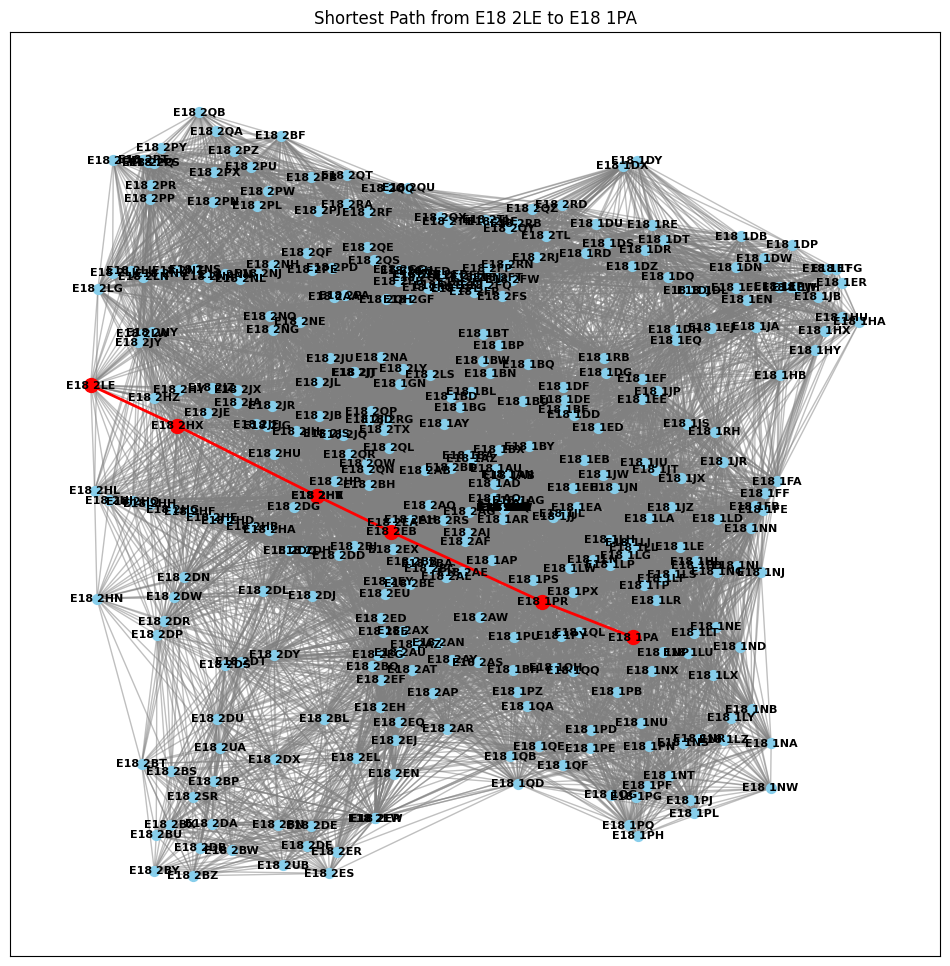

In [ ]:
import math
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Function to calculate the Haversine distance between two points on Earth
def haversine(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    R = 6371  # Earth radius in kilometers
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return R * c  # Distance in kilometers

# A* Algorithm implementation to find the shortest path
def a_star(graph, start, goal):
    open_set = []
    heappush(open_set, (0, start))
    
    g_costs = {start: 0}
    f_costs = {start: haversine(graph.nodes[start]['pos'], graph.nodes[goal]['pos'])}
    came_from = {}
    
    while open_set:
        current_f_cost, current = heappop(open_set)
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path
        
        for neighbor in graph.neighbors(current):
            tentative_g_cost = g_costs[current] + haversine(graph.nodes[current]['pos'], graph.nodes[neighbor]['pos'])
            
            if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                came_from[neighbor] = current
                g_costs[neighbor] = tentative_g_cost
                f_costs[neighbor] = tentative_g_cost + haversine(graph.nodes[neighbor]['pos'], graph.nodes[goal]['pos'])
                heappush(open_set, (f_costs[neighbor], neighbor))
    
    return None  # No path found

# Create a NetworkX graph and add nodes with their positions
G = nx.Graph()
for _, row in df.iterrows():
    G.add_node(row['Postcode'], pos=(row['Longitude'], row['Latitude']))

# Add edges between all nodes
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            distance = haversine((row1['Latitude'], row1['Longitude']), (row2['Latitude'], row2['Longitude']))
            if distance < 0.5:  # Example threshold, 0.5 km
                G.add_edge(row1['Postcode'], row2['Postcode'], weight=distance)

# Get user input for start and end postcodes
start_postcode = input("Enter the start postcode: ")
end_postcode = input("Enter the end postcode: ")

# Check if postcodes exist in the graph
if start_postcode not in G or end_postcode not in G:
    print(f"One or both postcodes not found in the data.")
else:
    # Find the shortest path using A* algorithm
    shortest_path = a_star(G, start_postcode, end_postcode)

    if shortest_path:
        print(f"Shortest path from {start_postcode} to {end_postcode}:")
        print(" -> ".join(shortest_path))
        
        # Visualize the graph
        pos = nx.get_node_attributes(G, 'pos')
        plt.figure(figsize=(12, 12))
        
        # Draw all edges (all possible paths)
        nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.5)

        # Draw all nodes
        nx.draw_networkx_nodes(G, pos, node_size=50, node_color="skyblue")

        # Highlight the shortest path with a specific color
        path_edges = list(zip(shortest_path, shortest_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color="red", node_size=100)

        # Add labels to nodes
        nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")
        
        plt.title(f'Shortest Path from {start_postcode} to {end_postcode}')
        plt.show()
    else:
        print(f"No path found between {start_postcode} and {end_postcode}.")


In [ ]:
import math
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Function to calculate the Haversine distance between two points on Earth
def haversine(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    R = 6371  # Earth radius in kilometers
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return R * c  # Distance in kilometers

# A* Algorithm implementation to find the shortest path
def a_star(graph, start, goal):
    open_set = []
    heappush(open_set, (0, start))
    
    g_costs = {start: 0}
    f_costs = {start: haversine(graph.nodes[start]['pos'], graph.nodes[goal]['pos'])}
    came_from = {}
    
    while open_set:
        current_f_cost, current = heappop(open_set)
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path
        
        for neighbor in graph.neighbors(current):
            tentative_g_cost = g_costs[current] + haversine(graph.nodes[current]['pos'], graph.nodes[neighbor]['pos'])
            
            if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                came_from[neighbor] = current
                g_costs[neighbor] = tentative_g_cost
                f_costs[neighbor] = tentative_g_cost + haversine(graph.nodes[neighbor]['pos'], graph.nodes[goal]['pos'])
                heappush(open_set, (f_costs[neighbor], neighbor))
    
    return None  # No path found

# Function to find all paths between start and goal using DFS
def find_all_paths(graph, start, goal, path=[]):
    path = path + [start]
    if start == goal:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph.neighbors(start):
        if node not in path:
            newpaths = find_all_paths(graph, node, goal, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

df = pd.read_csv('dataset.csv')
# Create a NetworkX graph and add nodes with their positions
G = nx.Graph()
for _, row in df.iterrows():
    G.add_node(row['Postcode'], pos=(row['Longitude'], row['Latitude']))

# Add edges between all nodes (Optional: Filter by distance threshold)
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            distance = haversine((row1['Latitude'], row1['Longitude']), (row2['Latitude'], row2['Longitude']))
            if distance < 0.5:  # Example threshold, 0.5 km
                G.add_edge(row1['Postcode'], row2['Postcode'], weight=distance)

# Get user input for start and end postcodes
start_postcode = input("Enter the start postcode: ")
end_postcode = input("Enter the end postcode: ")

# Check if postcodes exist in the graph
if start_postcode not in G or end_postcode not in G:
    print(f"One or both postcodes not found in the data.")
else:
    # Find all possible paths between the start and end postcodes
    all_paths = find_all_paths(G, start_postcode, end_postcode)

    if not all_paths:
        print(f"No paths found between {start_postcode} and {end_postcode}.")
    else:
        print(f"Found {len(all_paths)} paths from {start_postcode} to {end_postcode}.")
        
        # Find the shortest path using A* algorithm
        shortest_path = a_star(G, start_postcode, end_postcode)

        if shortest_path:
            print(f"Shortest path from {start_postcode} to {end_postcode}:")
            print(" -> ".join(shortest_path))
            
            # Visualize the graph
            pos = nx.get_node_attributes(G, 'pos')
            plt.figure(figsize=(12, 12))

            # Draw all possible paths
            for path in all_paths:
                path_edges = list(zip(path, path[1:]))
                nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="gray", alpha=0.5)

            # Draw all nodes
            nx.draw_networkx_nodes(G, pos, node_size=50, node_color="skyblue")

            # Highlight the shortest path with a specific color
            shortest_path_edges = list(zip(shortest_path, shortest_path[1:]))
            nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color="red", width=2)
            nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color="red", node_size=100)

            # Add labels to nodes
            nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

            plt.title(f'Shortest Path from {start_postcode} to {end_postcode}')
            plt.show()
        else:
            print(f"No shortest path found between {start_postcode} and {end_postcode}.")
